In [1]:
#Load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,mean_squared_error
from matplotlib import pyplot as plt
from scipy.special import expit
import random
import math
import operator 
from scipy.special import expit
import warnings
warnings.filterwarnings('ignore')

In [2]:
# I have removed the column custattr1 since it seems irrelevant data/feature
#Load the Data
datasetB = pd.read_csv('Data/Set-B.X.csv') 
classLabelsB = pd.read_csv('Data/Set-B.y.csv',header=None) 

print(datasetB.info()) 
print(datasetB.shape) #(100000, 18) 
print(classLabelsB.shape) #(100000, 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
amount        100000 non-null float64
hour1         100000 non-null int64
state1        100000 non-null object
zip1          100000 non-null int64
field1        100000 non-null int64
custAttr2     100000 non-null object
field2        100000 non-null int64
hour2         100000 non-null int64
flag1         100000 non-null int64
total         100000 non-null float64
field3        100000 non-null int64
field4        100000 non-null int64
indicator1    100000 non-null int64
indicator2    100000 non-null int64
flag2         100000 non-null int64
flag3         100000 non-null int64
flag4         100000 non-null int64
flag5         100000 non-null int64
dtypes: float64(2), int64(14), object(2)
memory usage: 13.7+ MB
None
(100000, 18)
(100000, 1)


In [3]:
# Check for any missing values. There's one missing value in feature domain and I placed most occuring domain in that missing space
print(datasetB.isnull().values.any()) 

False


In [4]:
#convert each of the string(State and domain) variables into numerical
le = LabelEncoder()
datasetB["state1"] = le.fit_transform(datasetB["state1"].astype(str))
datasetB["custAttr2"] = le.fit_transform(datasetB["custAttr2"].astype(str))
datasetB

,amount,hour1,state1,zip1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,50,986,0,31742,0,0,0,12.95,-723,19,0,0,0,0,0,1
1,38.85,0,50,980,3,40931,1,0,0,38.85,5497,14,1,0,0,1,0,1
2,38.85,0,19,402,2,49163,1,0,0,38.85,-4420,23,0,0,1,1,0,1
3,12.95,0,6,958,3,23219,0,0,0,12.95,5010,31,0,0,1,0,0,1
4,38.85,0,12,300,3,23817,1,0,0,38.85,-4074,21,0,0,1,0,0,1
5,12.95,0,5,852,3,17587,0,0,1,12.95,-2753,24,0,0,1,1,0,1
6,11.01,0,6,950,3,7576,0,0,0,11.01,2429,14,0,0,0,0,0,1
7,10.36,0,50,980,3,41312,1,0,1,10.36,5927,7,0,0,1,0,0,2
8,49.95,0,6,953,3,30552,0,0,1,49.95,4942,9,0,0,1,1,0,1
9,38.85,0,6,917,2,39719,0,0,1,38.85,-383,6,0,0,1,0,0,2


# _Task 1 : Logistic Regression based Classifier (LR)_

## _Data Preprocessing_

In [5]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
X_train, X_test, y_train, y_test = train_test_split(datasetB, classLabelsB, test_size=0.2)

print(X_train.shape) #(80000, 19) 2121 fraudulent
print(y_train.shape)
print(X_test.shape)  #(20000, 19) 533 fraudulent 
print(y_test.shape)

(80000, 18)
(80000, 1)
(20000, 18)
(20000, 1)


In [6]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc )

print(X_train_sc.shape) 
print(X_train_sc)

#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
print(X_test_sc.shape) 

(80000, 18)
             0         1         2         3     4         5    6         7   \
0      0.833194  0.695652  0.226415  0.298087  0.75  0.442500  1.0  0.695652   
1      0.332777  0.478261  0.301887  0.604230  0.75  0.971079  0.0  0.478261   
2      0.183653  0.608696  0.867925  0.772407  0.75  0.418528  1.0  0.608696   
3      0.216013  0.043478  0.622642  0.071501  0.50  0.875660  0.0  0.043478   
4      0.216013  1.000000  0.113208  0.919436  0.75  0.888195  1.0  1.000000   
5      0.216013  0.478261  0.396226  0.017120  0.50  0.499672  0.0  0.478261   
6      0.216013  0.260870  0.547170  0.283988  0.75  0.664984  1.0  0.260870   
7      0.648040  0.826087  0.698113  0.449144  0.50  0.614130  0.0  0.869565   
8      0.648040  0.304348  0.207547  0.343404  0.00  0.625724  1.0  0.304348   
9      0.648040  0.565217  0.754717  0.171198  0.50  0.285959  1.0  0.565217   
10     0.432027  0.478261  0.698113  0.426989  0.50  0.160192  1.0  0.478261   
11     0.216013  1.000000  0

In [7]:
## create vector of ones for X0
XTrain = np.hstack([np.ones([X_train_sc.shape[0],1]), X_train_sc])
print(XTrain.shape) #(75745, 20)

XTest = np.hstack([np.ones([X_test_sc.shape[0],1]), X_test_sc])
print(XTest.shape) #(18937, 20)


(80000, 19)
(20000, 19)


## _Logistic Regression based classifier(Mini-batch gradient descent)_

In [8]:
#--Lgestic Regression Sigmoid Function--------------------------------------------
def sigmoidFunction(z):
    return 1.0/(1.0+np.exp(-z))

#---------------------------Mini Batch Gradient Descent To get Coefficients--------------------------------
def next_batch(X,y,batchSize):
    for i in range(0,X.shape[0],batchSize):
        yield(X[i:i+batchSize],y[i:i+batchSize])

def MiniBatch_GradDescent(X,y,alpha,nEpoch,batchSize):
    #y=np.concatenate(np.array(y))
    Weight = np.random.uniform(size=(X.shape[1],))
    for epoch in range (0,nEpoch):
        for (batchX,batchY) in next_batch(X,y,batchSize):
            WX = np.dot(batchX,Weight)
            h = sigmoidFunction(WX)
            error = h-batchY
            gradient = np.dot(batchX.T,error)
            Weight = Weight-alpha*gradient
    return Weight

#Function to predict class label
def predict(X,W):
    prediction=sigmoidFunction(X.dot(W))
    threshold = 0.5
    for i in range (0,len(prediction)):
        if prediction[i] >= threshold:
            prediction[i] = 1
        elif prediction[i] < threshold:
            prediction[i] = 0
    return prediction


## _1.1 : 10-fold cross validation to obtain the best set of hyper-parameter values_

In [23]:
def kfold(X,y,alpha,nEpoch,batchSize):
    #y=np.concatenate(np.array(y))
    kf = KFold(n_splits=10, shuffle=True)
    i=0
    PredictionError=[]
    AccuracyScores=[]
    for train_index, test_index in kf.split(X):
        i=i+1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        W= MiniBatch_GradDescent(X_train, y_train,alpha,nEpoch,batchSize)
        yprediction = predict(X_test,W)
        Error=np.sqrt(mean_squared_error(y_test, yprediction))
        PredictionError.append(Error)
        accuracy = accuracy_score(y_test, yprediction)
        AccuracyScores.append(accuracy)
        
    MSE=sum(PredictionError)/10
    MeanAccuracy=sum(AccuracyScores)/10
    return(MSE,MeanAccuracy)

In [12]:
Error1,Accuracy1 = kfold(XTrain,y_train,0.01,50,32)
Error2,Accuracy2 = kfold(XTrain,y_train,0.01,25,32)
Error3,Accuracy3 = kfold(XTrain,y_train,0.01,10,32)
Error4,Accuracy4 = kfold(XTrain,y_train,0.01,10,64)
Error5,Accuracy5 = kfold(XTrain,y_train,0.1,50,32)
Error6,Accuracy6 = kfold(XTrain,y_train,0.1,25,32)
Error7,Accuracy7 = kfold(XTrain,y_train,0.1,10,32)
Error8,Accuracy8 = kfold(XTrain,y_train,0.1,10,64)
Error9,Accuracy9 = kfold(XTrain,y_train,1,50,32)
Error10,Accuracy10 = kfold(XTrain,y_train,1,25,32)
Error11,Accuracy11 = kfold(XTrain,y_train,1,10,32)
Error12,Accuracy12 = kfold(XTrain,y_train,1,10,64)

In [13]:
df =pd.DataFrame.from_records([{'alpha, iterations, BatchSize': '0.01, 50, 32', 'Prediction Error':Error1,'Accuracy':Accuracy1 },
                               {'alpha, iterations, BatchSize': '0.01, 25, 32', 'Prediction Error':Error2,'Accuracy':Accuracy2},
                               {'alpha, iterations, BatchSize': '0.01, 10, 32', 'Prediction Error':Error3,'Accuracy':Accuracy3},
                               {'alpha, iterations, BatchSize': '0.01, 10, 64', 'Prediction Error':Error4,'Accuracy':Accuracy4},
                               {'alpha, iterations, BatchSize': '0.1, 50, 32', 'Prediction Error':Error5,'Accuracy':Accuracy5},
                               {'alpha, iterations, BatchSize': '0.1, 25, 32', 'Prediction Error':Error6,'Accuracy':Accuracy6},
                               {'alpha, iterations, BatchSize': '0.1, 10, 32', 'Prediction Error':Error7,'Accuracy':Accuracy7},
                               {'alpha, iterations, BatchSize': '0.1, 10, 64', 'Prediction Error':Error8,'Accuracy':Accuracy8},  
                               {'alpha, iterations, BatchSize': '1, 50, 32', 'Prediction Error':Error9,'Accuracy':Accuracy9},
                               {'alpha, iterations, BatchSize': '1, 25, 32', 'Prediction Error':Error10,'Accuracy':Accuracy10},
                               {'alpha, iterations, BatchSize': '1, 10, 32', 'Prediction Error':Error11,'Accuracy':Accuracy11},
                               {'alpha, iterations, BatchSize': '1, 10, 64', 'Prediction Error':Error12,'Accuracy':Accuracy12},
                              ], columns=['alpha, iterations, BatchSize','Prediction Error','Accuracy'])
df

,"alpha, iterations, BatchSize",Prediction Error,Accuracy
0,"0.01, 50, 32",0.150118,0.977425
1,"0.01, 25, 32",0.150199,0.977425
2,"0.01, 10, 32",0.150447,0.977325
3,"0.01, 10, 64",0.150609,0.977288
4,"0.1, 50, 32",0.149899,0.977500
5,"0.1, 25, 32",0.149996,0.977488
6,"0.1, 10, 32",0.149905,0.977487
7,"0.1, 10, 64",0.150662,0.977275
8,"1, 50, 32",0.176164,0.967900
9,"1, 25, 32",0.155329,0.975762


## _1.2:Train the classifier on the training set_

Confusion Matrix : 
[[77800    82]
 [ 1719   399]]
accuracy = 0.9774875
precision = 0.8295218295218295
recall = 0.18838526912181303
F1 = 0.30704116968064643
AUC = 0.594


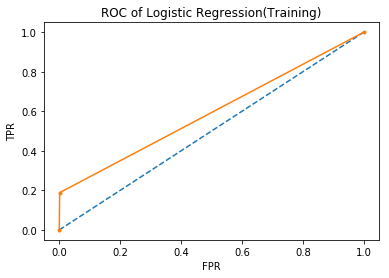

In [14]:
yTrain=np.concatenate(np.array(y_train))
#Calculating Coeffifients using training data
W=MiniBatch_GradDescent(XTrain,yTrain,0.1,10,32)
TrainPrediction=predict(XTrain,W)

confusion = confusion_matrix(y_train,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_train, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_train, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_train, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_train, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, TrainPrediction)

# calculate AUC
auc = roc_auc_score(y_train, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC of Logistic Regression(Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _1.3:Test Dataset_

Confusion Matrix : 
[[19437    27]
 [  448    88]]
accuracy = 0.97625
precision = 0.7652173913043478
recall = 0.16417910447761194
F1 = 0.2703533026113671
AUC = 0.581


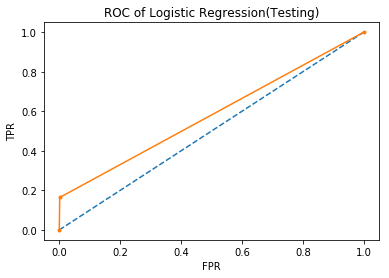

In [15]:
#Predicting class labels of test data using coefficients obtained from training
TestPrediction=predict(XTest,W)

confusion = confusion_matrix(y_test, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_test, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_test, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_test, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_test, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, TestPrediction)

# calculate AUC
auc = roc_auc_score(y_test, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC of Logistic Regression(Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _1.4: Classifier Overfitting or Underfitting ?_

## _1.5: Remedy for highly skewed distribution of class label_

### _Method 1:Resampling_

Class 0: 97346
Class 1: 2654
Proportion: 36.68 : 1


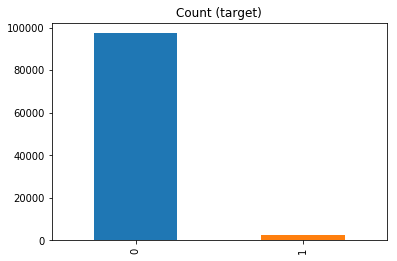

In [16]:
# Checking distribution of class labels 0 & 1
dataset = pd.concat([datasetB, classLabelsB], axis=1, sort=False)
dataset = dataset.rename(index=str, columns={0: "y"})

target_count = dataset.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

#### _Random under-sampling_

In [17]:
# Class count
count_class_0, count_class_1 = dataset.y.value_counts()

# Divide by class
df_class_0 = dataset[dataset['y'] == 0]
df_class_1 = dataset[dataset['y'] == 1]

Random under-sampling:
1    2654
0    2654
Name: y, dtype: int64


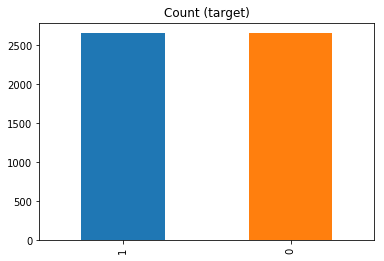

In [18]:
#Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (target)');

In [19]:
#Train-Test split
y=df_test_under['y']
X_train, X_test, y_train, y_test = train_test_split(df_test_under, y, test_size=0.2)
#print(X_train) 
print(X_train.shape) 
print(y_train.shape)
#print(X_test) 
print(X_test.shape) 
print(y_test.shape)

(4246, 19)
(4246,)
(1062, 19)
(1062,)


In [20]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_trainr_sc = pd.DataFrame(X_train_sc )
print(X_train_sc.shape) 

#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
print(X_test_sc.shape)

(4246, 19)
(1062, 19)


In [21]:
## create vector of ones for X0
XTrain = np.hstack([np.ones([X_train_sc.shape[0],1]), X_train_sc])
print(XTrain.shape) #(3350, 21)

XTest = np.hstack([np.ones([X_test_sc.shape[0],1]), X_test_sc])
print(XTest.shape) #(838, 21)


(4246, 20)
(1062, 20)


In [22]:
# Selecting only the feature columns
XTrain=XTrain[:,0:20]
XTest=XTest[:,0:20]

#### _Repeating 1.1(10-fold cross validation)_

In [24]:
Error1,Accuracy1 = kfold(XTrain,y_train,0.01,50,32)
Error2,Accuracy2 = kfold(XTrain,y_train,0.01,25,32)
Error3,Accuracy3 = kfold(XTrain,y_train,0.01,10,32)
Error4,Accuracy4 = kfold(XTrain,y_train,0.01,10,64)
Error5,Accuracy5 = kfold(XTrain,y_train,0.1,50,32)
Error6,Accuracy6 = kfold(XTrain,y_train,0.1,25,32)
Error7,Accuracy7 = kfold(XTrain,y_train,0.1,10,32)
Error8,Accuracy8 = kfold(XTrain,y_train,0.1,10,64)
Error9,Accuracy9 = kfold(XTrain,y_train,1,50,32)
Error10,Accuracy10 = kfold(XTrain,y_train,1,25,32)
Error11,Accuracy11 = kfold(XTrain,y_train,1,10,32)
Error12,Accuracy12 = kfold(XTrain,y_train,1,10,64)

In [25]:
df =pd.DataFrame.from_records([{'alpha, iterations, BatchSize': '0.01, 50, 32', 'Prediction Error':Error1,'Accuracy':Accuracy1 },
                               {'alpha, iterations, BatchSize': '0.01, 25, 32', 'Prediction Error':Error2,'Accuracy':Accuracy2},
                               {'alpha, iterations, BatchSize': '0.01, 10, 32', 'Prediction Error':Error3,'Accuracy':Accuracy3},
                               {'alpha, iterations, BatchSize': '0.01, 10, 64', 'Prediction Error':Error4,'Accuracy':Accuracy4},
                               {'alpha, iterations, BatchSize': '0.1, 50, 32', 'Prediction Error':Error5,'Accuracy':Accuracy5},
                               {'alpha, iterations, BatchSize': '0.1, 25, 32', 'Prediction Error':Error6,'Accuracy':Accuracy6},
                               {'alpha, iterations, BatchSize': '0.1, 10, 32', 'Prediction Error':Error7,'Accuracy':Accuracy7},
                               {'alpha, iterations, BatchSize': '0.1, 10, 64', 'Prediction Error':Error8,'Accuracy':Accuracy8},  
                               {'alpha, iterations, BatchSize': '1, 50, 32', 'Prediction Error':Error9,'Accuracy':Accuracy9},
                               {'alpha, iterations, BatchSize': '1, 25, 32', 'Prediction Error':Error10,'Accuracy':Accuracy10},
                               {'alpha, iterations, BatchSize': '1, 10, 32', 'Prediction Error':Error11,'Accuracy':Accuracy11},
                               {'alpha, iterations, BatchSize': '1, 10, 64', 'Prediction Error':Error12,'Accuracy':Accuracy12},
                              ], columns=['alpha, iterations, BatchSize','Prediction Error','Accuracy'])
df

,"alpha, iterations, BatchSize",Prediction Error,Accuracy
0,"0.01, 50, 32",0.0,1.0
1,"0.01, 25, 32",0.0,1.0
2,"0.01, 10, 32",0.0,1.0
3,"0.01, 10, 64",0.0,1.0
4,"0.1, 50, 32",0.0,1.0
5,"0.1, 25, 32",0.0,1.0
6,"0.1, 10, 32",0.0,1.0
7,"0.1, 10, 64",0.0,1.0
8,"1, 50, 32",0.0,1.0
9,"1, 25, 32",0.0,1.0


#### _Repeating 1.2_

Confusion Matrix : 
[[2100    0]
 [   0 2146]]
accuracy = 1.0
precision = 1.0
recall = 1.0
F1 = 1.0
AUC = 1.000


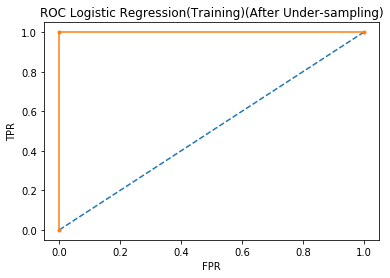

In [26]:
W=MiniBatch_GradDescent(XTrain,y_train,0.01,10,32)
TrainPrediction=predict(XTrain,W)

confusion = confusion_matrix(y_train,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_train, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_train, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_train, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_train, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, TrainPrediction)

# calculate AUC
auc = roc_auc_score(y_train, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Logistic Regression(Training)(After Under-sampling)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

#### _Repeating 1.3_

Confusion Matrix : 
[[554   0]
 [  0 508]]
accuracy = 1.0
precision = 1.0
recall = 1.0
F1 = 1.0
AUC = 1.000


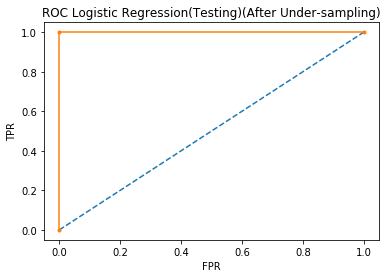

In [27]:
TestPrediction=predict(XTest,W)

confusion = confusion_matrix(y_test, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_test, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_test, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_test, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_test, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, TestPrediction)

# calculate AUC
auc = roc_auc_score(y_test, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Logistic Regression(Testing)(After Under-sampling)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

#### _Repeating 1.4_

# _Task 2 : Naive Bayes Classifier (NB)_

## _Data Preprocessing_

In [28]:
#Loading the Data Set Once again(since I did some changes to original data in last task)
datasetB = pd.read_csv('Data/Set-B.X.csv') #94682 
classLabelsB = pd.read_csv('Data/Set-B.y.csv',header=None) 

dataset = pd.concat([datasetB, classLabelsB], axis=1, sort=False)

#convert each of the categorical variables into numerical
le = LabelEncoder()
dataset["state1"] = le.fit_transform(dataset["state1"].astype(str))
dataset["custAttr2"] = le.fit_transform(dataset["custAttr2"].astype(str))
dataset

,amount,hour1,state1,zip1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,0
0,12.95,0,50,986,0,31742,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,50,980,3,40931,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,19,402,2,49163,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,6,958,3,23219,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,12,300,3,23817,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0
5,12.95,0,5,852,3,17587,0,0,1,12.95,-2753,24,0,0,1,1,0,1,0
6,11.01,0,6,950,3,7576,0,0,0,11.01,2429,14,0,0,0,0,0,1,0
7,10.36,0,50,980,3,41312,1,0,1,10.36,5927,7,0,0,1,0,0,2,0
8,49.95,0,6,953,3,30552,0,0,1,49.95,4942,9,0,0,1,1,0,1,0
9,38.85,0,6,917,2,39719,0,0,1,38.85,-383,6,0,0,1,0,0,2,0


In [29]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)  
print(y_test.shape)  

(80000, 19)
(80000,)
(20000, 19)
(20000,)


In [30]:
# Converting all from dataframe to array
XTrain = np.array(X_train)
yTrain = np.array(y_train)
XTest = np.array(X_test)
yTest = np.array(y_test)

## _Naive Bayes Classifier (NB)_

In [31]:
#Separate Data By Class-separate the training dataset instances by class value
def separateByClass(dataset):
    separated = {}
    for i in range(0,len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers)) 

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(0,len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))

def NaiveBayesModel(X,y):
    # prepare model
    summaries = summarizeByClass(X)
    # test model
    predictions = getPredictions(summaries, y)
    return predictions

## _2.1: 5-fold Cross Validation_

In [32]:
def kfold(X,y):
    kf = KFold(n_splits=5, shuffle=True)
    i=0
    PredictionError=[]
    AccuracyScores=[]
    for train_index, test_index in kf.split(X):
        i=i+1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        yprediction = NaiveBayesModel(X_train, X_test) 
        accuracy = getAccuracy(y_test,yprediction)
        
        Error=np.sqrt(mean_squared_error(y_test, yprediction))
        print('Kfold: {0}'.format(i))
        print('Error = {0}'.format(Error))
        print('Accuracy = {0}'.format(accuracy))
        PredictionError.append(Error)
        AccuracyScores.append(accuracy)
        precision = precision_score(y_test, yprediction)
        print("precision = {}".format(precision))
        recall = recall_score(y_test, yprediction)
        print("recall = {}".format(recall))
        F1 = f1_score(y_test, yprediction)
        print("F1 = {}".format(F1))
        
    MSE=sum(PredictionError)/5
    MeanAccuracy=sum(AccuracyScores)/5
    return(MSE,MeanAccuracy)


In [33]:
class1 = kfold(XTrain,yTrain)
class1

Kfold: 1
Error = 0.19764235376052372
Accuracy = 0.9609375
precision = 0.2954091816367265
recall = 0.3523809523809524
F1 = 0.32138979370249726
Kfold: 2
Error = 0.2064582282206258
Accuracy = 0.957375
precision = 0.2803921568627451
recall = 0.31222707423580787
F1 = 0.29545454545454547
Kfold: 3
Error = 0.2006240264773888
Accuracy = 0.95975
precision = 0.2581967213114754
recall = 0.3088235294117647
F1 = 0.28125000000000006
Kfold: 4
Error = 0.2073644135332772
Accuracy = 0.957
precision = 0.2574074074074074
recall = 0.32629107981220656
F1 = 0.2877846790890269
Kfold: 5
Error = 0.20463381929681126
Accuracy = 0.958125
precision = 0.25100401606425704
recall = 0.2962085308056872
F1 = 0.27173913043478265


(0.20334456825772534, 0.9586375)

## _2.2:Train the classifier on the Training Dataset_

Confusion Matrix : 
[[76037  1829]
 [ 1458   676]]
accuracy = 0.9589125
precision = 0.2698602794411178
recall = 0.316776007497657
F1 = 0.2914421211467989
AUC = 0.647


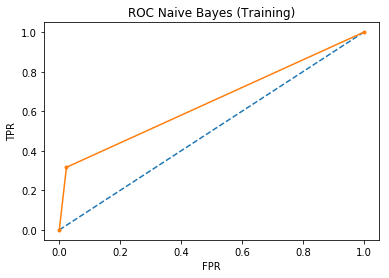

In [34]:
TrainPrediction = NaiveBayesModel(XTrain, XTrain)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTrain, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _2.3:Test the classifier on the Test Dataset_

Confusion Matrix : 
[[19007   473]
 [  351   169]]
accuracy = 0.9588
precision = 0.2632398753894081
recall = 0.325
F1 = 0.2908777969018933
AUC = 0.650


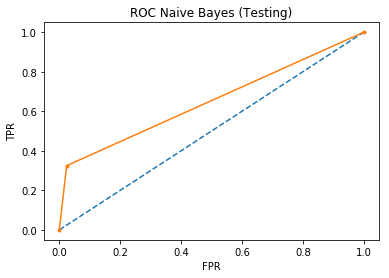

In [35]:
TestPrediction = NaiveBayesModel(XTrain, XTest)

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTest, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _2.4: Classifier Overfitting or Underfitting ?_

## _2.5: Remedy for highly skewed distribution of class label_

### _Resampling(Random under-sampling)_

Class 0: 97346
Class 1: 2654
Proportion: 36.68 : 1


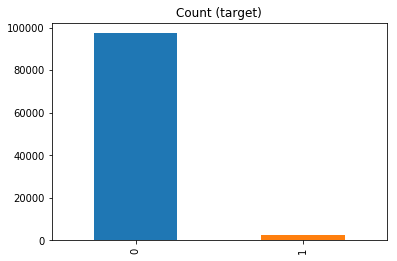

In [36]:
dataset = dataset.rename(index=str, columns={0: "y"})
target_count = dataset.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Random under-sampling:
1    2654
0    2654
Name: y, dtype: int64


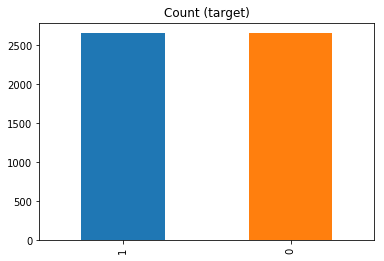

In [37]:
# Class count
count_class_0, count_class_1 = dataset.y.value_counts()

# Divide by class
df_class_0 = dataset[dataset['y'] == 0]
df_class_1 = dataset[dataset['y'] == 1]

#Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (target)');

In [38]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=df_test_under['y']
X_train, X_test, y_train, y_test = train_test_split(df_test_under, y, test_size=0.2)
print(X_train.shape) #(3350, 20) 1654 fraudulent 
print(y_train.shape)
print(X_test.shape)  #(838, 20) 440 fraudulent
print(y_test.shape)

(4246, 19)
(4246,)
(1062, 19)
(1062,)


In [39]:
XTrain = np.array(X_train)
yTrain = np.array(y_train)
XTest = np.array(X_test)
yTest = np.array(y_test)

### _Repeating 2.1_

In [40]:
class2 = kfold(XTrain,yTrain)
class2

Kfold: 1
Error = 0.5871165832719607
Accuracy = 0.6552941176470588
precision = 0.9545454545454546
recall = 0.3394919168591224
F1 = 0.5008517887563884
Kfold: 2
Error = 0.6032889831358972
Accuracy = 0.6360424028268551
precision = 0.9577464788732394
recall = 0.3097949886104784
F1 = 0.46815834767641995
Kfold: 3
Error = 0.5974030962122289
Accuracy = 0.6431095406360424
precision = 0.9481481481481482
recall = 0.3018867924528302
F1 = 0.45796064400715564
Kfold: 4
Error = 0.6129732132715564
Accuracy = 0.624263839811543
precision = 0.9215686274509803
recall = 0.31473214285714285
F1 = 0.4692179700499168
Kfold: 5
Error = 0.601333422129589
Accuracy = 0.6383981154299175
precision = 0.9609375
recall = 0.28941176470588237
F1 = 0.4448462929475588


(0.6004230596042464, 0.6394216032702834)

### _Repeating 2.2_

Confusion Matrix : 
[[2047   30]
 [1512  657]]
accuracy = 0.6368346679227508
precision = 0.9563318777292577
recall = 0.3029045643153527
F1 = 0.46008403361344535
AUC = 0.644


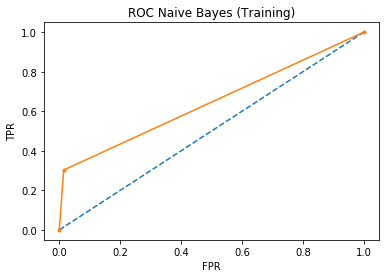

In [41]:
TrainPrediction = NaiveBayesModel(XTrain, XTrain)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTrain, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

### _Repeating 2.3_

Confusion Matrix : 
[[565  12]
 [331 154]]
accuracy = 0.6770244821092278
precision = 0.927710843373494
recall = 0.31752577319587627
F1 = 0.47311827956989244
AUC = 0.648


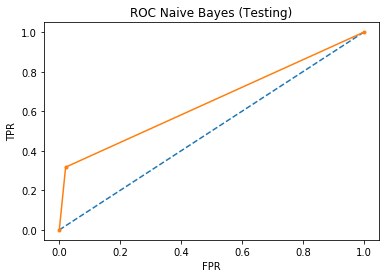

In [42]:
TestPrediction = NaiveBayesModel(XTrain, XTest)

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTest, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

### _Repeating 2.4_

# _Task 3 : kNN Classifier (kNN)_

## _Data Preprocessing_

In [43]:
#Loading the Reduced Dataset containing 10000 datas since full dataset taking very long time to execute 
datasetA = pd.read_csv('ReducedDataTask3/Set-B.X.csv') #94682 
classLabelsA = pd.read_csv('ReducedDataTask3/Set-B.y.csv',header=None) #0 for legitimate(negative) and 1 for fraudulent(positive) .2094 fraud transactions & 92588 legible transactions 

print(datasetA.info())
print(datasetA.shape) #(10000, 19)
print(classLabelsA.shape) #(10000, 1)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
amount        5000 non-null float64
hour1         5000 non-null int64
state1        5000 non-null object
zip1          5000 non-null int64
field1        5000 non-null int64
custAttr2     5000 non-null object
field2        5000 non-null int64
hour2         5000 non-null int64
flag1         5000 non-null int64
total         5000 non-null float64
field3        5000 non-null int64
field4        5000 non-null int64
indicator1    5000 non-null int64
indicator2    5000 non-null int64
flag2         5000 non-null int64
flag3         5000 non-null int64
flag4         5000 non-null int64
flag5         5000 non-null int64
dtypes: float64(2), int64(14), object(2)
memory usage: 703.2+ KB
None
(5000, 18)
(5000, 1)


In [47]:
Dataset_A = pd.concat([datasetA, classLabelsA], axis=1, sort=False)
#convert each of the categorical variables into numerical
le = LabelEncoder()
Dataset_A["state1"] = le.fit_transform(Dataset_A["state1"].astype(str))
Dataset_A["custAttr2"] = le.fit_transform(Dataset_A["custAttr2"].astype(str))
Dataset_A

,amount,hour1,state1,zip1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,0
0,12.95,0,47,986,0,1890,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,47,980,3,2445,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,17,402,2,2953,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,4,958,3,1411,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,10,300,3,1440,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0
5,12.95,0,3,852,3,1071,0,0,1,12.95,-2753,24,0,0,1,1,0,1,0
6,11.01,0,4,950,3,431,0,0,0,11.01,2429,14,0,0,0,0,0,1,0
7,10.36,0,47,980,3,2467,1,0,1,10.36,5927,7,0,0,1,0,0,2,0
8,49.95,0,4,953,3,1818,0,0,1,49.95,4942,9,0,0,1,1,0,1,0
9,38.85,0,4,917,2,2378,0,0,1,38.85,-383,6,0,0,1,0,0,2,0


In [48]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=Dataset_A.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(Dataset_A, y, test_size=0.2)
#print(X_train) 
print(X_train.shape) #(8000, 20)
print(y_train.shape) #(8000,)
#print(X_test) 
print(X_test.shape)  #(2000, 20)
print(y_test.shape)  #(2000,)

(4000, 19)
(4000,)
(1000, 19)
(1000,)


In [49]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_trainr_sc = pd.DataFrame(X_train_sc )
print(X_train_sc.shape) 

#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
print(X_test_sc.shape) 

# This step will normalize all the input features to unit vector and hence we can calculate Euclidean distance


(4000, 19)
(1000, 19)


In [50]:
# Converting all from dataframe to array
XTrain = np.array(X_train_sc)
yTrain = np.array(y_train)
XTest = np.array(X_test_sc)
yTest = np.array(y_test)

## _kNN Classifier (kNN)_

In [51]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def knnModel(train,test,k):
    # generate predictions
    predictions=[]
    for x in range(len(test)):
        neighbors = getNeighbors(train, test[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    return predictions
    

## _3.1: 10-fold Cross Validation to obtain the best value for k_

In [52]:
def kfold(X,y,k):
    kf = KFold(n_splits=10, shuffle=True)
    i=0
    #PredictionError=[]
    AccuracyScores=[]
    PrecisionScores=[]
    RecallScores=[]
    F1Scores=[]
    for train_index, test_index in kf.split(X):
        i=i+1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        yprediction = knnModel(X_train,X_test,k)
        accuracy = getAccuracy(y_test,yprediction)
        #print('Kfold: {0}'.format(i))
        #print('Accuracy = {0}'.format(accuracy))
        AccuracyScores.append(accuracy)
        
        precision = precision_score(y_test, yprediction)
        #print("precision = {}".format(precision))
        PrecisionScores.append(precision)
        
        recall = recall_score(y_test, yprediction)
        #print("recall = {}".format(recall))
        RecallScores.append(recall)
        
        F1 = f1_score(y_test, yprediction)
        #print("F1 = {}".format(F1))
        F1Scores.append(F1)
        
    MeanAccuracy=sum(AccuracyScores)/10
    MeanPrecision=sum(PrecisionScores)/10
    MeanRecall=sum(RecallScores)/10
    MeanF1=sum(F1Scores)/10
    return(MeanAccuracy,MeanPrecision,MeanRecall,MeanF1)

In [ ]:
Accuracy1,Precision1,Recall1,F11 = kfold(XTrain,yTrain,1)
Accuracy2,Precision2,Recall2,F12 = kfold(XTrain,yTrain,3)
Accuracy3,Precision3,Recall3,F13 = kfold(XTrain,yTrain,5)
Accuracy4,Precision4,Recall4,F14 = kfold(XTrain,yTrain,9)

In [ ]:
df =pd.DataFrame.from_records([{'k': '1', 'Accuracy':Accuracy1,'Precision':Precision1,'Recall':Recall1,'F1':F11},
                               {'k': '3', 'Accuracy':Accuracy2,'Precision':Precision2,'Recall':Recall2,'F1':F12},
                               {'k': '5', 'Accuracy':Accuracy3,'Precision':Precision3,'Recall':Recall3,'F1':F13},
                               {'k': '9', 'Accuracy':Accuracy4,'Precision':Precision4,'Recall':Recall4,'F1':F14},
                              ], columns=['k','Accuracy','Precision','Recall','F1'])
df

## _3.2:Train the classifier on the training set_

Confusion Matrix : 
[[3870   12]
 [  85   33]]
accuracy = 97.575
precision = 0.7333333333333333
recall = 0.2796610169491525
F1 = 0.40490797546012264
AUC = 0.638


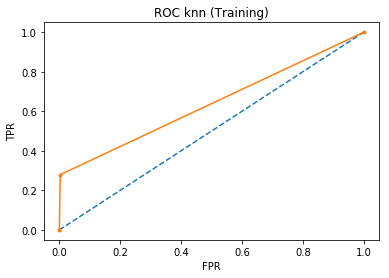

In [53]:
k=5
TrainPrediction = knnModel(XTrain,XTrain,k)
accuracy = getAccuracy(yTrain,TrainPrediction)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC knn (Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()


## _3.3:Test Dataset_

Confusion Matrix : 
[[972   2]
 [ 18   8]]
accuracy = 98.0
precision = 0.8
recall = 0.3076923076923077
F1 = 0.4444444444444444
AUC = 0.653


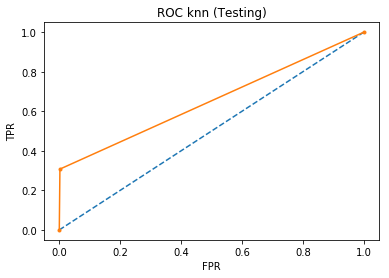

In [54]:
k=5
TestPrediction = knnModel(XTrain,XTest,k)
accuracy = getAccuracy(yTest,TestPrediction)

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC knn (Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _3.4: Classifier Overfitting or Underfitting ?_

## _3.5: Remedy for highly skewed distribution of class label_

### _Resampling(Random under-sampling)_

In [55]:
FulldatasetA = pd.read_csv('Data/Set-B.X.csv') #94682 
FullclassLabelsA = pd.read_csv('Data/Set-B.y.csv',header=None) 

dataset = pd.concat([FulldatasetA, FullclassLabelsA], axis=1, sort=False)

le = LabelEncoder()
dataset["state1"] = le.fit_transform(dataset["state1"].astype(str))
dataset["custAttr2"] = le.fit_transform(dataset["custAttr2"].astype(str))

dataset = dataset.rename(index=str, columns={0: "y"})


Class 0: 97346
Class 1: 2654
Proportion: 36.68 : 1


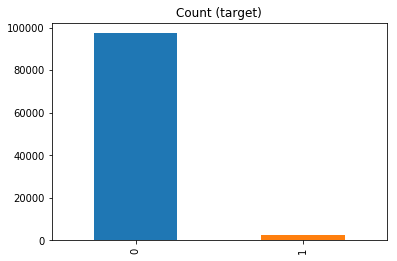

In [56]:
target_count = dataset.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Random under-sampling:
1    2654
0    2654
Name: y, dtype: int64


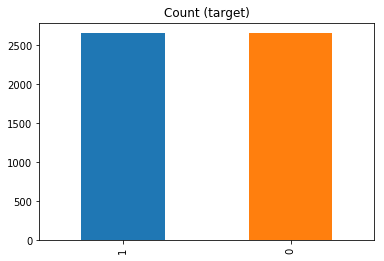

In [57]:
# Class count
count_class_0, count_class_1 = dataset.y.value_counts()

# Divide by class
df_class_0 = dataset[dataset['y'] == 0]
df_class_1 = dataset[dataset['y'] == 1]

#Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (target)');

In [58]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=df_test_under['y']
X_train, X_test, y_train, y_test = train_test_split(df_test_under, y, test_size=0.2)
#print(X_train) 
print(X_train.shape) #(3350, 20) 1654 fraudulent 
print(y_train.shape)
#print(X_test) 
print(X_test.shape)  #(838, 20) 440 fraudulent
print(y_test.shape)

(4246, 19)
(4246,)
(1062, 19)
(1062,)


In [59]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_trainr_sc = pd.DataFrame(X_train_sc )
#print(X_train_sc)
print(X_train_sc.shape) 
print(X_train_sc)
#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
#print(X_test_sc)
print(X_test_sc.shape) 

(4246, 19)
[[6.54040404e-01 8.69565217e-01 9.61538462e-02 ... 0.00000000e+00
  3.05064063e-04 0.00000000e+00]
 [6.54040404e-01 8.26086957e-01 8.65384615e-01 ... 0.00000000e+00
  3.05064063e-04 0.00000000e+00]
 [2.18013468e-01 1.30434783e-01 7.69230769e-02 ... 0.00000000e+00
  3.05064063e-04 1.00000000e+00]
 ...
 [0.00000000e+00 6.52173913e-01 8.46153846e-01 ... 0.00000000e+00
  4.88102502e-01 1.00000000e+00]
 [6.54040404e-01 4.78260870e-01 1.92307692e-01 ... 0.00000000e+00
  3.05064063e-04 0.00000000e+00]
 [8.40909091e-01 8.69565217e-01 8.65384615e-01 ... 0.00000000e+00
  3.05064063e-04 0.00000000e+00]]
(1062, 19)


In [60]:
XTrain = np.array(X_train)
yTrain = np.array(y_train)
XTest = np.array(X_test)
yTest = np.array(y_test)

### _Repeating 3.1_

In [ ]:
Accuracy1,Precision1,Recall1,F11 = kfold(XTrain,yTrain,1)

### _Repeating 3.2_

Confusion Matrix : 
[[1733  396]
 [ 494 1623]]
accuracy = 79.0390956194065
precision = 0.8038632986627043
recall = 0.7666509211147851
F1 = 0.784816247582205
AUC = 0.790


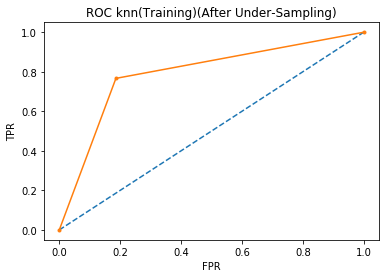

In [61]:
k=5
TrainPrediction = knnModel(XTrain,XTrain,k)
accuracy = getAccuracy(yTrain,TrainPrediction)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC knn(Training)(After Under-Sampling)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()


### _Repeating 3.3_

In [ ]:
k=5
TestPrediction = knnModel(XTrain,XTest,k)
accuracy = getAccuracy(yTest,TestPrediction)

np.savetxt("knn_Test_Prediction.csv", TestPrediction)

Error=np.sqrt(mean_squared_error(yTest, TestPrediction))
print("Error = {}".format(Error))

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

### _Repeating 3.4_

# _Task 4 : Comparing performances of LR, NB and kNN classifiers_

##  _4.1:_

##  _4.2:_

##  _4.3:_